# ECE 457B - Assignment 3

## By: Sheen Thusoo, 20728766

### Problem 1

In [1]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6b4c1114cf40a4608a5eca548f72367a556fbb614c862d6b2e5b101356805057
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
s = np.linspace(0,6,500) # Support Set
lambd, n, a = 2, 2, 3

# Membership Function
def mu_a(x):
  return np.exp( -lambd* np.power( (x - a), n) )

def minus_mu_a(x):
  return 1 - mu_a(x)

def alpha_cut(x):
  return fuzz.lambda_cut(x, 1/2)

M1: 0.523


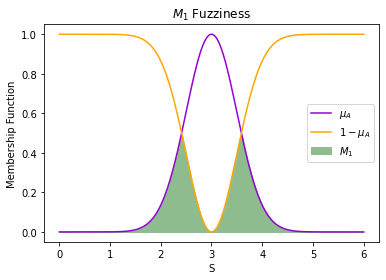

In [4]:
# Part a)
def m1(x):
  return mu_a(x) if mu_a(x) <= 0.5 else (1 - mu_a(x))

membership_func = mu_a(s)
membership_minus = np.array([ minus_mu_a(x) for x in s ])
M1 = np.array([ m1(x) for x in s ])

print('M1: {:.3f}'.format(integrate.quad(m1, 0, 6)[0]))

fig, ax = plt.subplots()
ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
ax.plot(s, membership_minus, label='$1 - \mu_A$', color='orange')
ax.fill_between(s, M1, color='darkseagreen', alpha=1, label='$M_1$')
ax.set_title('$M_1$ Fuzziness')
ax.set_xlabel('S')
ax.set_ylabel('Membership Function')
ax.legend(loc='best')

M2: 0.523


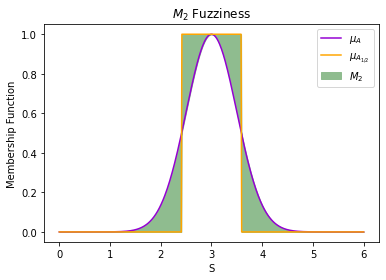

In [5]:
# Part b)
def m2(x):
  half_mu_a = 1 if mu_a(x) >= 0.5 else 0
  return np.abs(mu_a(x) - half_mu_a)

M2 = np.array([ m2(x) for x in s ])
print('M2: {:.3f}'.format(integrate.quad(m2, 0, 6)[0]))

fig, ax = plt.subplots()
ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
ax.plot(s, alpha_cut(membership_func), label='$\mu_{A_{1/2}}$', color='orange')
ax.fill_between(s, membership_func, alpha_cut(membership_func), color='darkseagreen', label='$M_2$')
ax.set_title('$M_2$ Fuzziness')
ax.set_xlabel('S')
ax.set_ylabel('Membership Function')
ax.legend(loc='best')

M3: 4.953


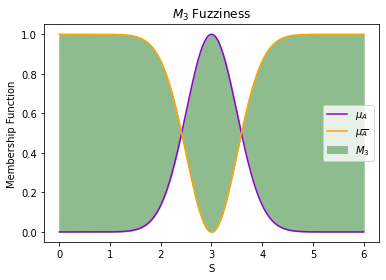

In [6]:
# Part c)
def m3(x):
  return np.abs(mu_a(x) - minus_mu_a(x))

M3 = np.array([ m3(x) for x in s ])
print('M3: {:.3f}'.format(integrate.quad(m3, 0, 6)[0]))

fig, ax = plt.subplots()
ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
ax.plot(s, minus_mu_a(s), label='$\mu_{\overline{A}}$', color='orange')
ax.fill_between(s, membership_func, minus_mu_a(s), color='darkseagreen', label='$M_3$')
ax.set_title('$M_3$ Fuzziness')
ax.set_xlabel('S')
ax.set_ylabel('Membership Function')
ax.legend(loc='best')

### Problem 2

In [7]:
# No Code Required

### Problem 3

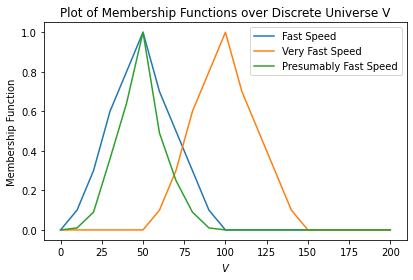

In [8]:
V = np.arange(0, 201, 10)
F = np.array([0, 0.1, 0.3, 0.6, 0.8, 1.0, 0.7, 0.5, 0.3, 0.1,0,0,0,0,0,0,0,0,0,0,0])

mu_F_1 = np.roll(F, 5) # shift right by 50
mu_F_2 = F **2 # square

fig, ax = plt.subplots(figsize=(6.5,4))
ax.plot(V, F, label='Fast Speed')
ax.plot(V, mu_F_1, label='Very Fast Speed')
ax.plot(V, mu_F_2, label='Presumably Fast Speed')
ax.set_title('Plot of Membership Functions over Discrete Universe V')
ax.set_xlabel('$V$')
ax.set_ylabel('Membership Function')
ax.legend(loc='best')

### Problem 4

In [9]:
# No Code Required

### Problem 5

#### Part a)

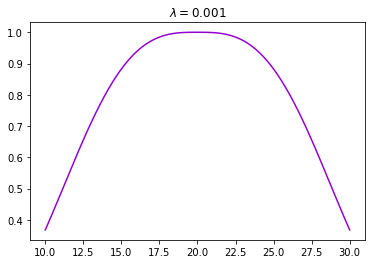

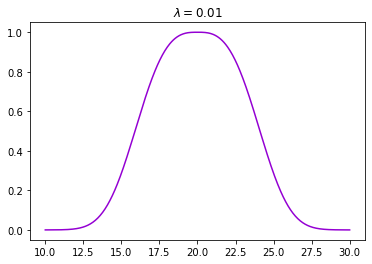

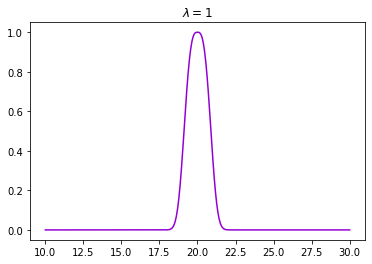

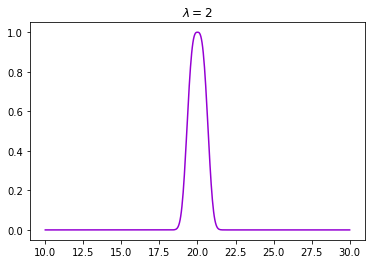

In [10]:
lambd_param = [0.001, 0.01, 1, 2]

# Membership Function
def mu_a(x, lambd, a, n):
  return np.exp( -lambd* np.abs( np.power( (x - a), n) ) )

# Support Set
s = np.linspace(10,30,500)

for num in lambd_param:
  membership_func = mu_a(s, num, a=20, n=3)

  fig, ax = plt.subplots()
  ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
  ax.set_title('$\lambda = {}$'.format(num))

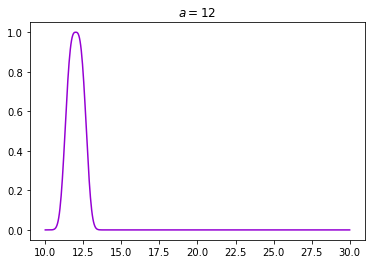

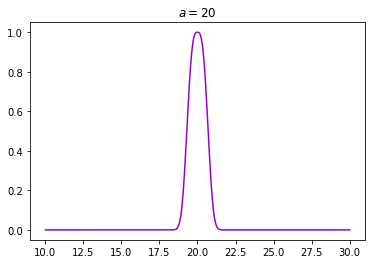

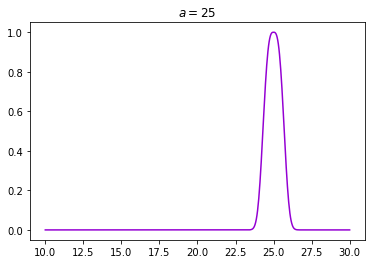

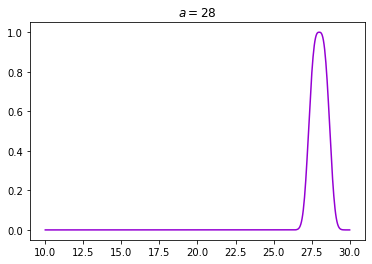

In [11]:
a_param = [12, 20, 25, 28]
for num in a_param:
  membership_func = mu_a(s, lambd=2, a=num, n=3)

  fig, ax = plt.subplots()
  ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
  ax.set_title('$a = {}$'.format(num))

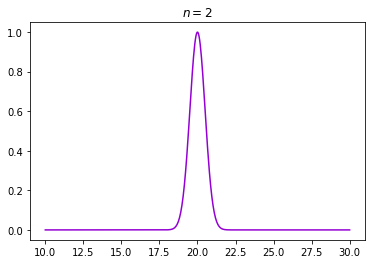

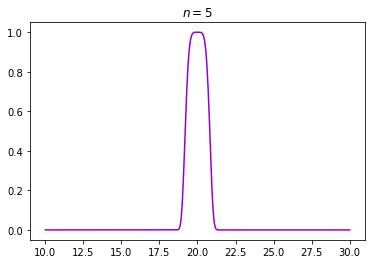

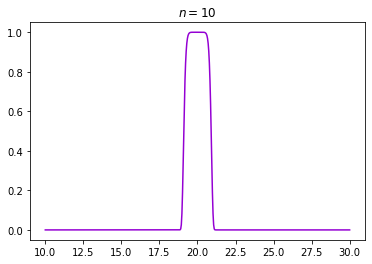

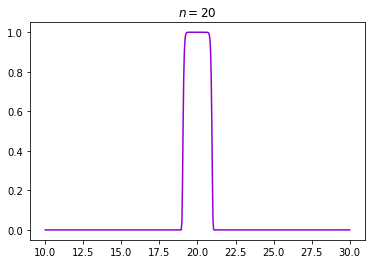

In [12]:
n_param = [2, 5, 10, 20]
for num in n_param:
  membership_func = mu_a(s, lambd=2, a=20, n=num)

  fig, ax = plt.subplots()
  ax.plot(s, membership_func, label='$\mu_A$', color='darkviolet')
  ax.set_title('$n = {}$'.format(num))

#### Part b)

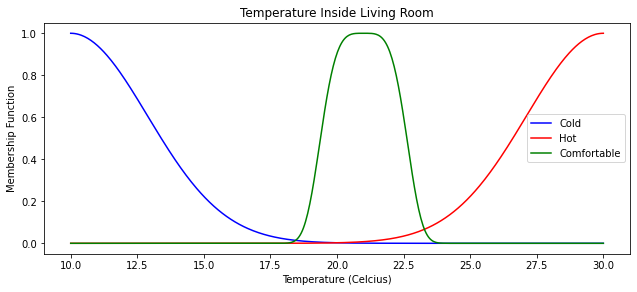

In [13]:
cold = mu_a(s, lambd=0.06, a=10, n=2)
hot = mu_a(s, lambd=0.06, a=30, n=2)
comfortable = mu_a(s, lambd=0.1, a=21, n=4)

fig, ax = plt.subplots(figsize=(10.5,4.25))
ax.plot(s, cold, label='Cold', color='blue')
ax.plot(s, hot, label='Hot', color='red')
ax.plot(s, comfortable, label='Comfortable', color='green')
ax.set_title('Temperature Inside Living Room')
ax.set_xlabel('Temperature (Celcius)')
ax.set_ylabel('Membership Function')
ax.legend(loc='best')